<a href="https://colab.research.google.com/github/LaraNegri/EntregasPDI/blob/main/TP2/Practico2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Trabajo práctico 2

Creado por: Lara Negri

## Descripción del práctico

El trabajo práctico consiste en 2 partes:

* Primera parte:
>* Manipular independientemente la luminancia y la saturación de una imagen.
>* Convertir cada pixel de la imagen del espacio RGB al espacio YIQ.
>* Alterar los valores de Y (para cambiar la luminancia) y/o de IQ (para cambiar la saturación).
>* Con los nuevos valores de YIQ, convertir a RGB nuevamente y obtener una nueva imagen.
* Segunda parte:
>* Utilizar datasets 2D (mapas de altitud, de temperatura, etc.) y visualizarlos con diferentes paletas, incluyendo la de niveles de gris y la arco iris.

#Librerias requeridas

In [ ]:
import matplotlib
import numpy as np
import pandas as pd
import imageio as io

#Funciones a utilizar

In [ ]:
# Función para leer una imagen y tenerla como Array numpy sin limitación uint8
def get_image(rute):
  im = io.imread(rute)
  im = im.astype(np.int)
  return im

  # Plotear Imagen
def plot_image(im, title, cmap=None):
  fig, ax = pyplot.subplots(dpi=100)
  ax.imshow(im, cmap=cmap)
  ax.set_title(title)
  pyplot.axis('off')
  pyplot.show()

#Parte 1

##Lectura de la imagen

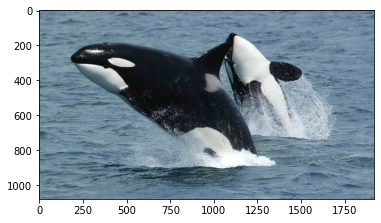

In [ ]:
#@title Selecccione una Imagen. { run: "auto" }

Fruits = 'https://www.lavanguardia.com/files/og_thumbnail/uploads/2019/06/04/5e99794702a16.jpeg'
Dogs ='https://ichef.bbci.co.uk/news/976/cpsprodpb/14545/production/_120496238_gettyimages-1253904293.jpg'
Whale = 'https://www.thoughtco.com/thmb/S1SaSlZvPsW4V1Y5jf1-EOgRIDs=/1920x1080/smart/filters:no_upscale()/killer-whales-591130_1920-a40d29197e584bccb50fdae288bf6eb5.jpg'
Imagen = 'Whale' #@param ["Fruits", "Dogs", "Whale"]

if Imagen == 'Fruits':
  image = get_image(Fruits)
  pyplot.imshow(image) 
  pyplot.show()
elif Imagen == 'Dogs':
  image = get_image(Dogs)
  pyplot.imshow(image) 
  pyplot.show()
elif Imagen == 'Whale':
  image = get_image(Whale)
  pyplot.imshow(image) 
  pyplot.show()

## Obtención de canales RGB, pasaje a YIQ y nuevamente a RGB

In [ ]:
#Obtengo la información de los canales R, G, B normalizados
R = (image[:, :, 0])/255
G = (image[:, :, 1])/255
B = (image[:, :, 2])/255


Ahora, para poder transformar las coordenadas RGB a YIQ debemos hacer el siguiente producto matricial

\[
\begin{bmatrix}
Y \\
I \\
Q
\end{bmatrix} 
=
\begin{bmatrix}
0.299 & 0.587 & 0.114 \\
0.595716 & -0.274453 & -0.321263 \\
0.211456 & -0.522591 & 0.3111135
\end{bmatrix}

\begin{bmatrix}
R \\
G \\
B
\end{bmatrix}
\]

Voy a cargar los valores de la matriz para hacer la multiplicación componente a componente

In [ ]:
#Parámetros de la matriz
a = 0.299
b = 0.587
c = 0.114

d = 0.595716
e = -0.274453
f = -0.321263

g = 0.211456
h = -0.522591
j = 0.311135


Hago el producto matricial y obtengo las componentes Y, I, Q

In [ ]:
Y = a*R + b*G + c*B 
I = d*R + e*G + c*B
Q = g*R + h*G + j*B

El usuario puede elegir el parámetro alfa con el que va a modificar el canal Y, y el parámetro beta con el que va a modificar los canales I y Q.

In [ ]:
alfa = 0.2 #@param {type:"slider", min:0, max:5, step:0.1}
newY= alfa * Y

beta = 0.4 #@param {type:"slider", min:0, max:5, step:0.1}
newI = beta * I
newQ = beta * Q

Revisamos las condiciones que deben cumplir YIQ para hacer bien la transformación

In [ ]:
newY = np.clip(newY, np.min(newY), 1)
newI = np.clip(newI, -0.5957, 0.5957)
newQ = np.clip(newQ, -0.5226, 0.5226)

Ahora tenemos que volver a las componentes RGB. Para eso usamos la matriz de la transformada inversa. Cargamos las componentes de la matriz y a continuación realizamos los cálculos necesarios para obtener las componentes RGB modificadas.

In [ ]:
#Ahora nuevamente pasamos a R, G, B

k = 1
l = 0.9663
m = 0.6210

n = 1
o = -0.2721
p = -0.6474

q = 1
r = -1.1070
s = 1.7046

R = (k*newY + l*newI + m*newQ)*255
G = (n*newY + o*newI + p*newQ)*255
B = (q*newY + r*newI + s*newQ)*255

Tenemos que asegurarnos que los valores obtenidos de RGB sean valores con sentido. Es decir, deben estar comprendidos en el rango [0, 255]

In [ ]:
#Tengo que asegurarme que los valores de R, G y B se encuentren en el rango de [0, 255]
R = np.clip(R, 0, 255)
G = np.clip(G, 0, 255)
B = np.clip(B, 0, 255)

## Obtención de imagen final

Finalmente, con los valores de RGB finales, vuelvo a crear la imagen

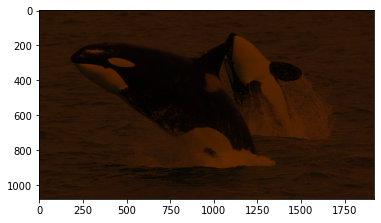

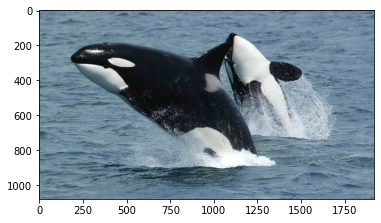

In [ ]:
finalimage = np.dstack((R,G,B)).round(decimals = 0)
finalimage = finalimage.astype('uint8')

# muestro la imagen
pyplot.imshow(finalimage)
pyplot.show()

pyplot.imshow(image)
pyplot.show()

## Conclusiones

En esta parte del trabajo, se puede ver que, al igual que se vió en la teoría, la mayor parte de la información de la imagen (al rededor del 80% de la información) se encuentra en el canal Y.
Esto puede observarse modificando el parámetro alfa, y viendo cómo se modifican las imágenes muy claramente. Sin embargo, al variar el parámetro beta, a pesar de que también se observan variaciones claras, para pequeñas variaciones del parámetro, las modificaciones en la imagen no son tan perceptibles como en el caso anterior.

Por otro lado, se puede observar, que al menos en las imágenes elegidas para este trabajo, las partes menos luminosas de la imagen, es decir, "los negros" o colores oscuros, son los que mejor se preservan ante variaciones en los canales. 
Esto puede deberse a que los extremos, los "blancos" y "negros", son facilmente distinguibles entre sí, y respecto de otros colores intermedios, dado que se encuentran en los extremos de la luminancia, y esto hace que, ante variaciones no extremas de los canales Y e IQ, aún sea posible distinguir con claridad las formas más oscuras, o muy claras.

#Parte 2

##Lectura de la imagen

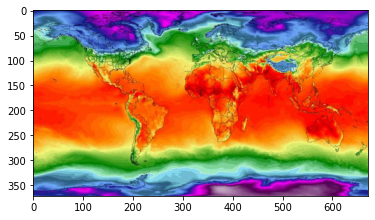

In [ ]:
#@title Selecccione una Imagen. { run: "auto" }

Temperature = 'https://ourplnt.com/wp-content/uploads/2018/04/Climate-Reanalyzer-World-Temperature-Map-672x372.jpg?is-pending-load=1'
Height ='https://aws1.discourse-cdn.com/mcneel/uploads/default/optimized/3X/b/c/bc05c5ddfbade37008be84c533826cc56458933d_2_690x416.png'

Imagen = 'Temperature' #@param ["Temperature", "Height"]

if Imagen == 'Temperature':
  image2 = get_image(Temperature)
  pyplot.imshow(image2) 
  pyplot.show()
elif Imagen == 'Height':
  image2 = get_image(Height)
  pyplot.imshow(image2) 
  pyplot.show()

## Obtención de componentes YIQ

In [ ]:
#Obtengo la información de los canales R, G, B normalizados
R = (image2[:, :, 0])/255
G = (image2[:, :, 1])/255
B = (image2[:, :, 2])/255

#Obtengo Y que es la componente que me interesa para pasar la imagen a escala de grises
Y = a*R + b*G + c*B 

Ahora que conozco la componente Y de la imagen, voy a pasarla a escala de grises

## Conversión a gray scale (escala de grises)

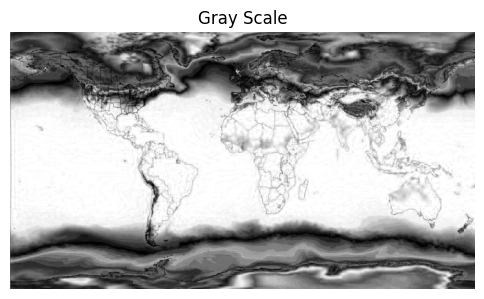

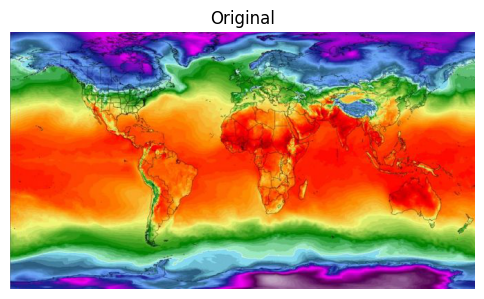

In [ ]:
plot_image(image2[:,:,0], 'Gray Scale', cmap='gray')

plot_image(image2, 'Original')
pyplot.show()

## Representación de la imagen en distintos colormaps a elección del usuario

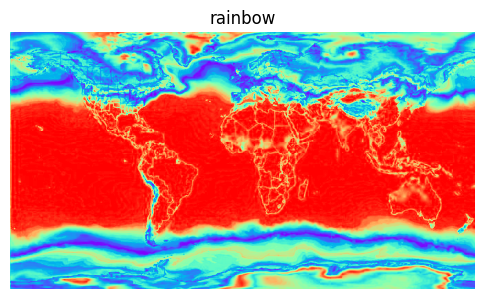

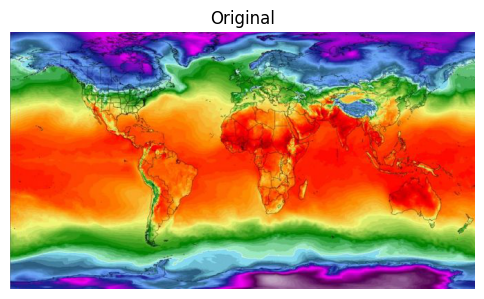

In [ ]:
#@title { run: "auto" }

colormap = "rainbow" #@param ["rainbow", "ocean", "prism", "Pastel1", "seismic","spring"]
selection = str(colormap)

selection

colormap
plot_image(image2[:,:,0], selection, cmap=colormap)

plot_image(image2, 'Original')
pyplot.show()

## Conclusiones

Al comparar los distintos mapas de colores, podemos ver con facilidad que, al menos para las imagenes escogidas para el trabajo, algunos son mucho más útiles para representar la información que otros.

En este caso, se trabajo con datos de temperatura promedio al rededor del mundo, y de alturas en una región del continente Europeo.

En ambos casos, al trabajar con la escala de grises la información se acota levemente. En el caso del mapa de alturas, no se distingue entre verdes y azules, unificando así grandes regiones de diferentes alturas en el mapa. Por otro lado, en el caso del mapa de temperaturas, tampoco es posible distinguir variaciones en temperaturas elevadas, representadas por amarillos, naranjas y rojos en el mapa original. 

En cuanto a los otros mapas de colores, vemos que el menos claro es el "prism", ya que genera demasiado ruido en la imagen que nos distrae de los datos reales que nos interesan.
Seguido a este se encuentran los mapas de colores "Pastel1" debido a que la imagen que devuelve es poco clara, todos los colores 'pasteles' son muy claritos, y no es posible distinguirlos entre sí con facilidad.
El mapa "spring" tampoco devuelve un resultado útil en mi opinión, ya que, al menos en mi caso, sólo logro distinguir los colores amarillo y rosa, siendo que los mapas originales presentaban mucha más variedad de datos (es decir, variedad de colores).

En mi opinión, el mapa más claro, al menos para representar los datos elegidos, es el "rainbow". El seismic también da buenos resultados al momento de distinguir las variaciones, pero no es claro en qué escala se maneja, es decir, a que colores asigna valores altos y a qué colores los valores altos. 
Por más que esto sea facilmente chequeable en la escala de colores asociada a cada mapa, me parece que el rainbow es mucho más intuitivo.
